In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


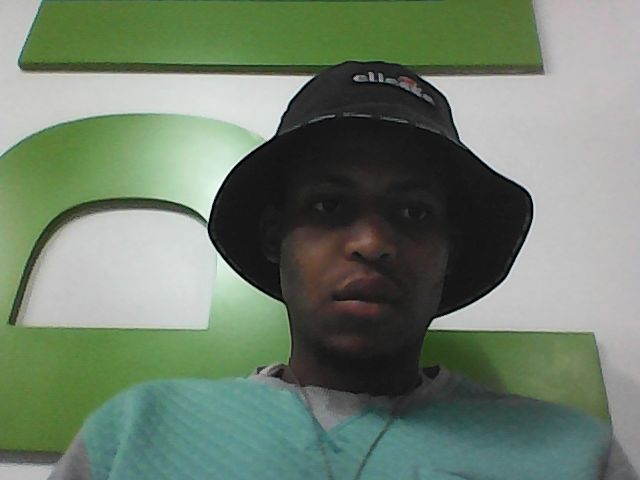

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data = ('/content/drive/MyDrive/Colab Notebooks/Product-List.xlsx')
table = pd.read_excel(data)
print(table)

           Product            Name  Price VAT        Barcode Weight 
0   Anti-Perspirant         Nivea    19.0   y       42354963    50ml
1   Anti-Perspirant        Blu Ice   18.0   y       60022271    40ml
2   Safety Matches            Lion    1.0   n       60069795     10g
3         Ointment         Zam-Buk    9.0   y       60097736      7g
4       Cold Drink       Coca-Cola   28.0   y   544900000967      2L
..              ...            ...    ...  ..            ...     ...
82             Cake  Country Value  251.0   y  6001008808180     2kg
83           juice      Cranberry    29.0   y  6009204751262      1L
84      Cold Drink           Fanta   28.0   y  5449000034113      2L
85      Cold Drink          Stoney   28.0   y  5449000258953      2L
86         Earphone       VDENMENV   62.0   y  6973224870589     10g

[87 rows x 6 columns]


In [4]:
results =[table]
print(results)

[           Product            Name  Price VAT        Barcode Weight 
0   Anti-Perspirant         Nivea    19.0   y       42354963    50ml
1   Anti-Perspirant        Blu Ice   18.0   y       60022271    40ml
2   Safety Matches            Lion    1.0   n       60069795     10g
3         Ointment         Zam-Buk    9.0   y       60097736      7g
4       Cold Drink       Coca-Cola   28.0   y   544900000967      2L
..              ...            ...    ...  ..            ...     ...
82             Cake  Country Value  251.0   y  6001008808180     2kg
83           juice      Cranberry    29.0   y  6009204751262      1L
84      Cold Drink           Fanta   28.0   y  5449000034113      2L
85      Cold Drink          Stoney   28.0   y  5449000258953      2L
86         Earphone       VDENMENV   62.0   y  6973224870589     10g

[87 rows x 6 columns]]


In [5]:
print(table.loc[3][4])

60097736


In [25]:
barcode = int(input('Enter the barcode:'))

table[table['Barcode'] == barcode]

Enter the barcode:60097736


,Product,Name,Price,VAT,Barcode,Weight
3,Ointment,Zam-Buk,9.0,y,60097736,7g


In [18]:
row_num =(table[table['Barcode'] == barcode]).index
print(row_num)

Index([], dtype='int64')


In [19]:
check_out = print(table.loc[row_num]['Price'])

Series([], Name: Price, dtype: float64)


In [20]:
table[table['Barcode'] == barcode]

,Product,Name,Price,VAT,Barcode,Weight


In [21]:
new_barcode = print(barcode)

table.loc[table['Barcode'] == barcode]

60097731


,Product,Name,Price,VAT,Barcode,Weight


In [22]:
print(np.where(table['Barcode'] == barcode))

(array([], dtype=int64),)


In [23]:
if np.where(table['Barcode'] == barcode) == barcode:
  print(row_num)
  print(check_out)
else:
  print('Invalid Barcode')
  print('Try Again')




Invalid Barcode
Try Again
